In [4]:
import gget

# gget.setup("cellxgene")

help(gget.cellxgene)

adata = gget.cellxgene(
    ensembl=True,
    verbose=True,
    gene=["ENSG00000125730","ENSG00000171860","ENSG00000106804","ENSG00000197405","ENSG00000134830","ENSG00000000971"],
    disease='normal',
    tissue_general='kidney',
)

adata

16:47:02 - INFO - Fetching AnnData object from CZ CELLxGENE Discover. This might take a few minutes...


Help on function cellxgene in module gget.gget_cellxgene:

cellxgene(species='homo_sapiens', gene=None, ensembl=False, column_names=['dataset_id', 'assay', 'suspension_type', 'sex', 'tissue_general', 'tissue', 'cell_type'], meta_only=False, tissue=None, cell_type=None, development_stage=None, disease=None, sex=None, is_primary_data=True, dataset_id=None, tissue_general_ontology_term_id=None, tissue_general=None, assay_ontology_term_id=None, assay=None, cell_type_ontology_term_id=None, development_stage_ontology_term_id=None, disease_ontology_term_id=None, donor_id=None, self_reported_ethnicity_ontology_term_id=None, self_reported_ethnicity=None, sex_ontology_term_id=None, suspension_type=None, tissue_ontology_term_id=None, census_version='stable', verbose=True, out=None)
    Query data from CZ CELLxGENE Discover (https://cellxgene.cziscience.com/) using the
    CZ CELLxGENE Discover Census (https://github.com/chanzuckerberg/cellxgene-census).

    NOTE: Querying large datasets requires

The "stable" release is currently 2025-01-30. Specify 'census_version="2025-01-30"' in future calls to open_soma() to ensure data consistency.


AnnData object with n_obs × n_vars = 597379 × 6
    obs: 'dataset_id', 'assay', 'suspension_type', 'sex', 'tissue_general', 'tissue', 'cell_type', 'is_primary_data', 'disease'
    var: 'soma_joinid', 'feature_id', 'feature_name', 'feature_type', 'feature_length', 'nnz', 'n_measured_obs'

In [7]:
print(adata.var_names[:10])  # Show the first 10 feature names
print(adata.var["feature_name"].head())  # Print first few feature names
adata.var_names = adata.var["feature_name"]
print([name for name in adata.var_names if "CFH" in name])
gene_map = dict(zip(adata.var["feature_name"], adata.var_names))
features_to_plot = [gene_map[gene] for gene in ['CFH', 'C5', 'C3AR1', 'C3_ENSG00000125730', 'C5AR1'] if gene in gene_map]

# sc.pl.violin(adata, features_to_plot, groupby="tissue_general", multi_panel=True)

Index(['0', '1', '2', '3', '4', '5'], dtype='object')
0                   CFH
1                    C5
2                 C3AR1
3    C3_ENSG00000125730
4                 C5AR1
Name: feature_name, dtype: object
['CFH']


In [11]:
import pandas as pd
pd.set_option("display.max_rows", None)  # Ensure all rows are displayed
print(pd.Series(adata.obs["cell_type"].unique()))


0                                   renal principal cell
1                            kidney collecting duct cell
2        kidney distal convoluted tubule epithelial cell
3      kidney loop of Henle thick ascending limb epit...
4                                             macrophage
5                          renal alpha-intercalated cell
6                     epithelial cell of proximal tubule
7                           renal beta-intercalated cell
8                         vasa recta ascending limb cell
9                                               monocyte
10                     columnar/cuboidal epithelial cell
11                vascular associated smooth muscle cell
12                 glomerular capillary endothelial cell
13                       vasa recta descending limb cell
14                                   natural killer cell
15                                                T cell
16                                               unknown
17                             

In [24]:
adata.var_names

Index(['CFH', 'C5', 'C3AR1', 'C3_ENSG00000125730', 'C5AR1', 'C5AR2'], dtype='object', name='feature_name')

Found 6 valid genes


/var/folders/dk/j41qmgy16b5_49s_wh137t_m0000gn/T/ipykernel_56686/3531133004.py:35: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  cell_type_mean_expr = cell_type_df.groupby("Cell_Type")["Expression"].mean()
/var/folders/dk/j41qmgy16b5_49s_wh137t_m0000gn/T/ipykernel_56686/3531133004.py:41: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  tissue_mean_expr = tissue_df.groupby("Tissue")["Expression"].mean()
/var/folders/dk/j41qmgy16b5_49s_wh137t_m0000gn/T/ipykernel_56686/3531133004.py:46: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will 

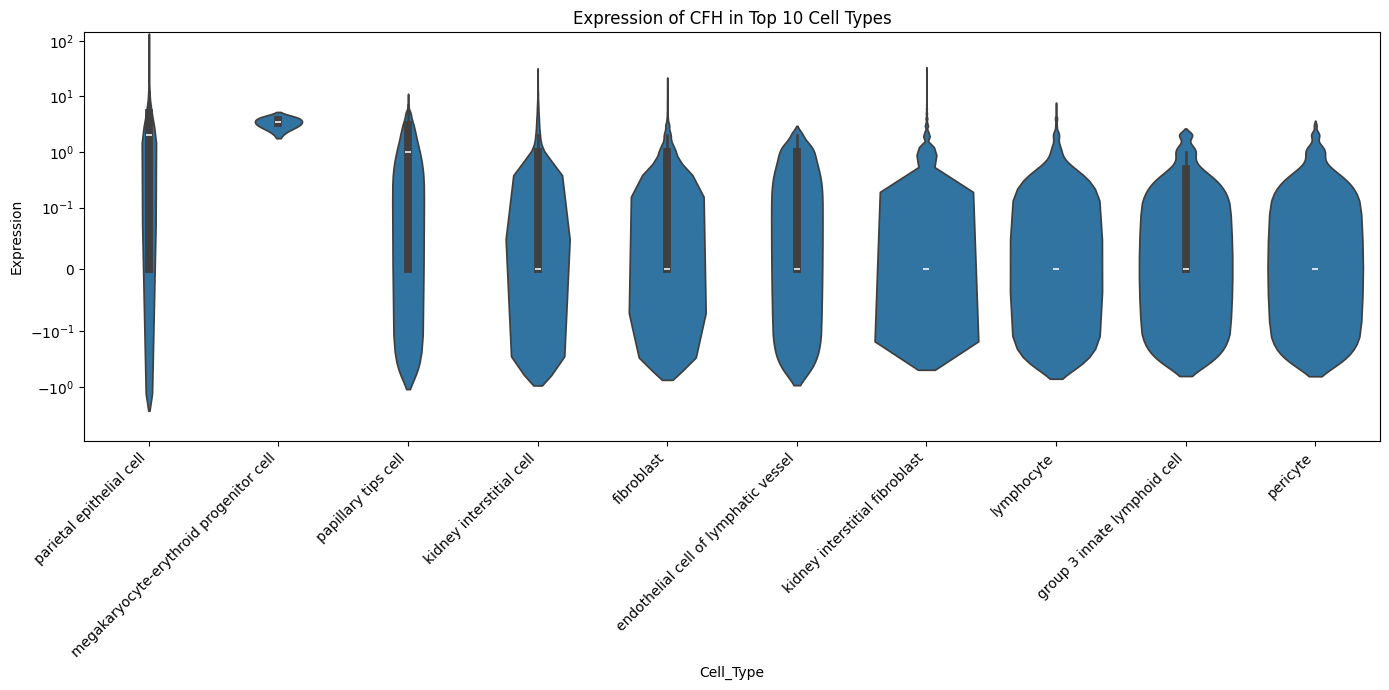

/var/folders/dk/j41qmgy16b5_49s_wh137t_m0000gn/T/ipykernel_56686/3531133004.py:35: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  cell_type_mean_expr = cell_type_df.groupby("Cell_Type")["Expression"].mean()
/var/folders/dk/j41qmgy16b5_49s_wh137t_m0000gn/T/ipykernel_56686/3531133004.py:41: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  tissue_mean_expr = tissue_df.groupby("Tissue")["Expression"].mean()


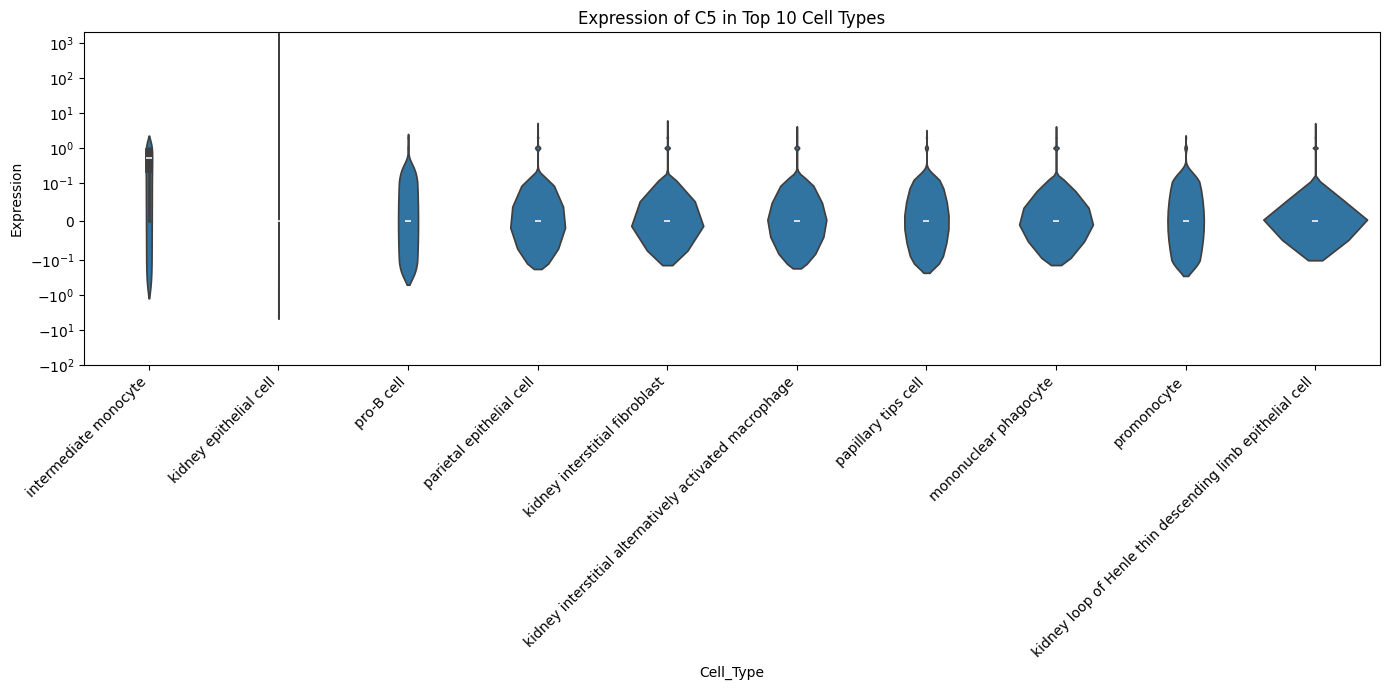

/var/folders/dk/j41qmgy16b5_49s_wh137t_m0000gn/T/ipykernel_56686/3531133004.py:35: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  cell_type_mean_expr = cell_type_df.groupby("Cell_Type")["Expression"].mean()
/var/folders/dk/j41qmgy16b5_49s_wh137t_m0000gn/T/ipykernel_56686/3531133004.py:41: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  tissue_mean_expr = tissue_df.groupby("Tissue")["Expression"].mean()


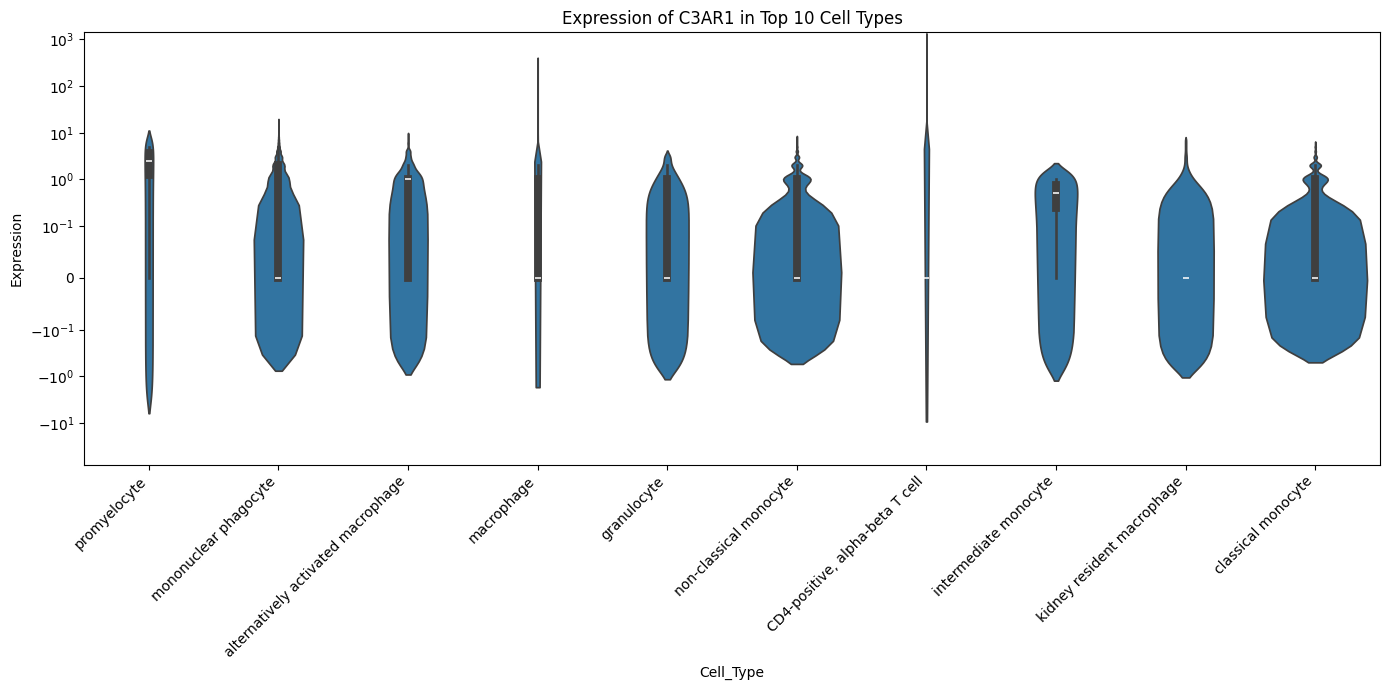

/var/folders/dk/j41qmgy16b5_49s_wh137t_m0000gn/T/ipykernel_56686/3531133004.py:35: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  cell_type_mean_expr = cell_type_df.groupby("Cell_Type")["Expression"].mean()
/var/folders/dk/j41qmgy16b5_49s_wh137t_m0000gn/T/ipykernel_56686/3531133004.py:41: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  tissue_mean_expr = tissue_df.groupby("Tissue")["Expression"].mean()


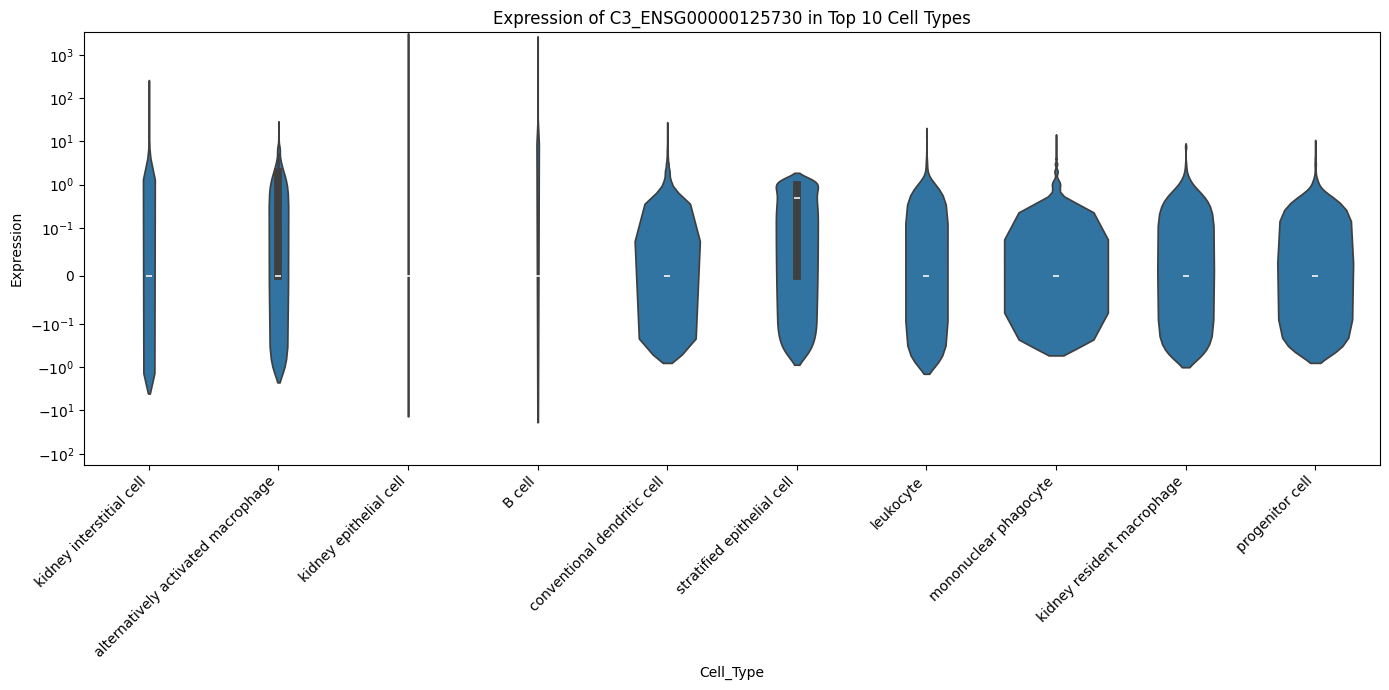

/var/folders/dk/j41qmgy16b5_49s_wh137t_m0000gn/T/ipykernel_56686/3531133004.py:35: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  cell_type_mean_expr = cell_type_df.groupby("Cell_Type")["Expression"].mean()
/var/folders/dk/j41qmgy16b5_49s_wh137t_m0000gn/T/ipykernel_56686/3531133004.py:41: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  tissue_mean_expr = tissue_df.groupby("Tissue")["Expression"].mean()


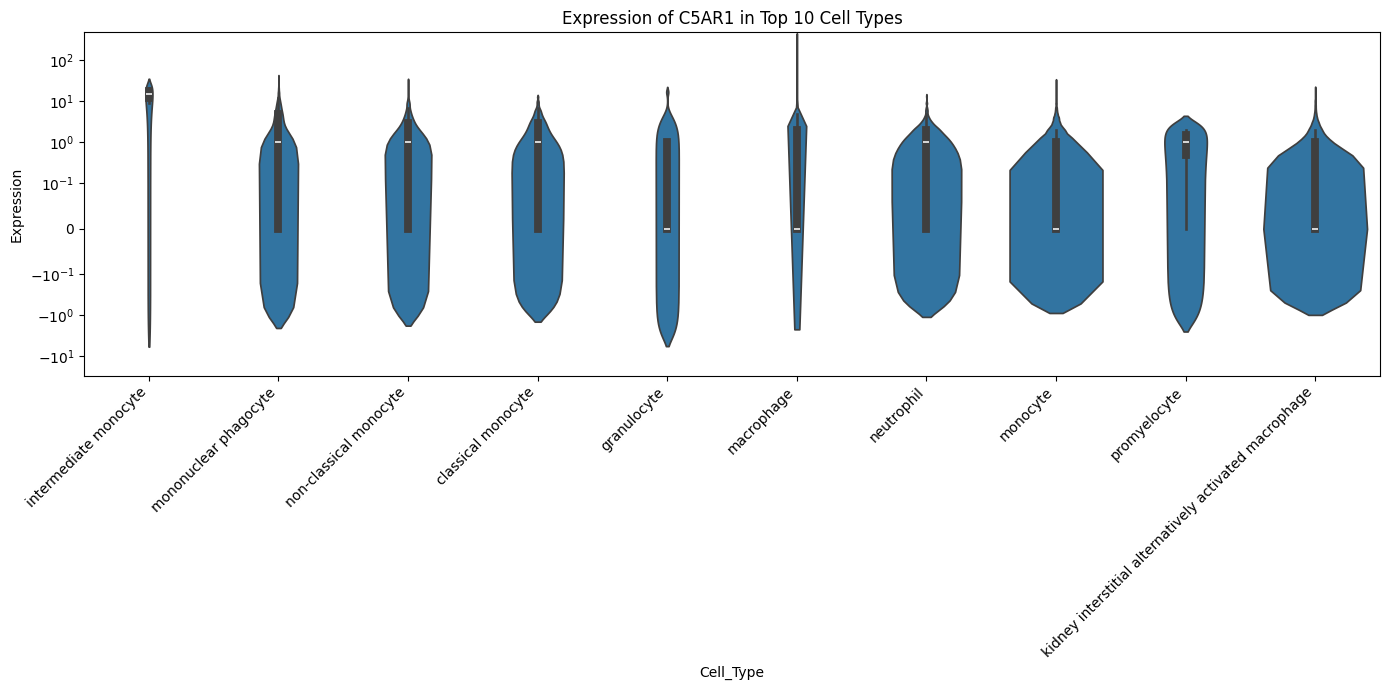

/var/folders/dk/j41qmgy16b5_49s_wh137t_m0000gn/T/ipykernel_56686/3531133004.py:35: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  cell_type_mean_expr = cell_type_df.groupby("Cell_Type")["Expression"].mean()
/var/folders/dk/j41qmgy16b5_49s_wh137t_m0000gn/T/ipykernel_56686/3531133004.py:41: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  tissue_mean_expr = tissue_df.groupby("Tissue")["Expression"].mean()


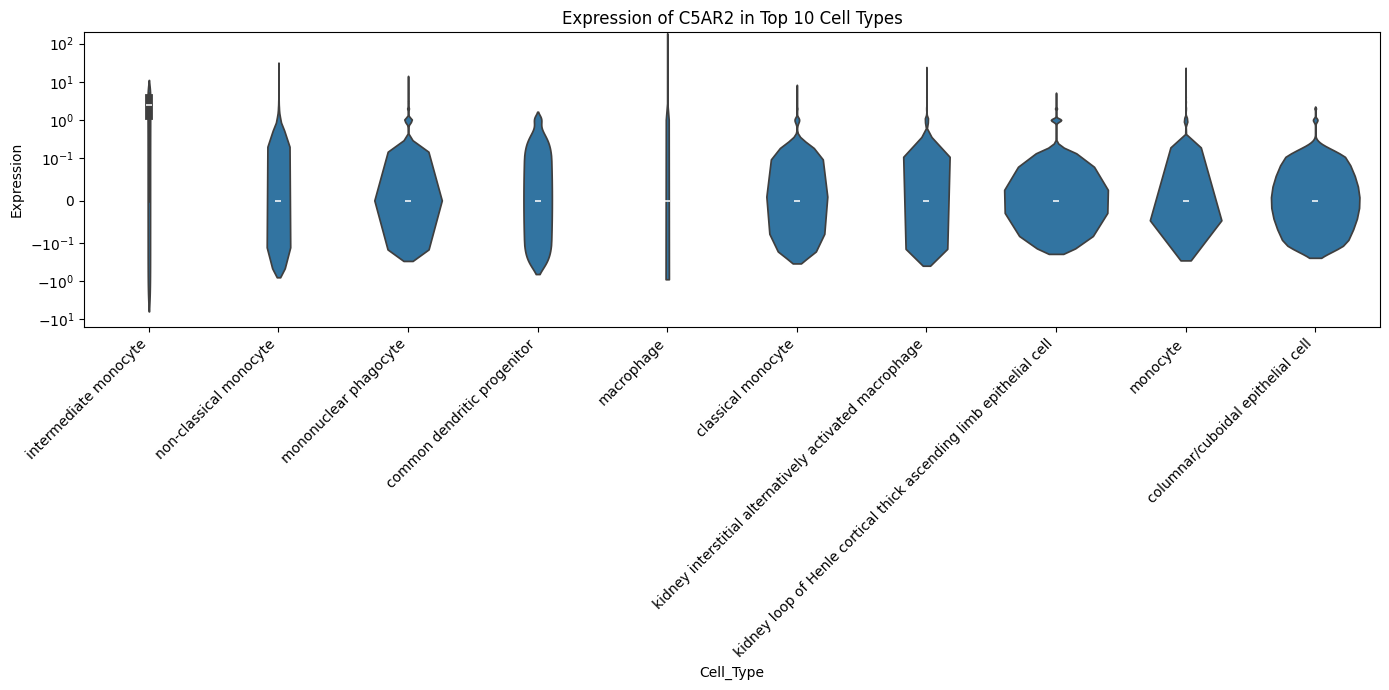

Maximum Expression by Tissue:
                 gene               tissue  max_expression
0                 CFH  kidney blood vessel        0.875000
1                  C5        renal medulla        0.076459
2               C3AR1               kidney        0.031461
3  C3_ENSG00000125730  kidney blood vessel        1.416667
4               C5AR1        renal medulla        0.294515
5               C5AR2  kidney blood vessel        0.187500

Top 5 Cell Types by Expression:
                  gene cell_type_rank  \
0                  CFH              1   
1                  CFH              2   
2                  CFH              3   
3                  CFH              4   
4                  CFH              5   
5                   C5              1   
6                   C5              2   
7                   C5              3   
8                   C5              4   
9                   C5              5   
10               C3AR1              1   
11               C3AR1          

In [34]:
import scanpy as sc
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# List of genes to analyze
genes = ['CFH', 'C5', 'C3AR1', 'C3_ENSG00000125730', 'C5AR1', 'C5AR2']

# Ensure the genes are in the dataset
valid_genes = [gene for gene in genes if gene in adata.var_names]

if not valid_genes:
    print("None of the specified genes are in the dataset.")
else:
    print(f"Found {len(valid_genes)} valid genes")

    # Create DataFrames to store results
    max_expr_tissue = pd.DataFrame(columns=["gene", "tissue", "max_expression"])
    top_cell_types = pd.DataFrame(columns=["gene", "cell_type_rank", "cell_type", "mean_expression"])

    for gene in valid_genes:
        # Get the expression values for the gene
        expr_values = adata[:, gene].X.toarray().flatten()

        # Get the tissue and cell_type information
        tissues = adata.obs["tissue"]
        cell_types = adata.obs["cell_type"]

        # Create DataFrames with expression values
        tissue_df = pd.DataFrame({"Expression": expr_values, "Tissue": tissues})
        cell_type_df = pd.DataFrame({"Expression": expr_values, "Cell_Type": cell_types})

        # Group by cell_type and calculate the mean expression
        cell_type_mean_expr = cell_type_df.groupby("Cell_Type")["Expression"].mean()

        # Find top 10 cell types for plotting
        top_10_cell_types = cell_type_mean_expr.sort_values(ascending=False).head(10).index.tolist()

        # Get tissue with max expression
        tissue_mean_expr = tissue_df.groupby("Tissue")["Expression"].mean()
        if not tissue_mean_expr.empty:
            max_tissue = tissue_mean_expr.idxmax()
            max_expr = tissue_mean_expr.max()
            new_row = pd.DataFrame({"gene": [gene], "tissue": [max_tissue], "max_expression": [max_expr]})
            max_expr_tissue = pd.concat([max_expr_tissue, new_row], ignore_index=True)

        # Get top 5 cell types for results table
        top_5_cell_types = cell_type_mean_expr.sort_values(ascending=False).head(5)
        for rank, (cell_type, expr) in enumerate(top_5_cell_types.items(), 1):
            new_cell_type_row = pd.DataFrame({
                "gene": [gene],
                "cell_type_rank": [rank],
                "cell_type": [cell_type],
                "mean_expression": [expr]
            })
            top_cell_types = pd.concat([top_cell_types, new_cell_type_row], ignore_index=True)

        # Plot with seaborn - only include top 10 cell types
        plt.figure(figsize=(14, 7))

        # Filter DataFrame to include only top 10 cell types
        cell_types_to_plot = cell_type_df[cell_type_df["Cell_Type"].isin(top_10_cell_types)]

        if not cell_types_to_plot.empty:
            # Sort the data so the cell types appear in descending order of expression
            order = cell_type_mean_expr.loc[top_10_cell_types].sort_values(ascending=False).index

            # Create the violin plot with ordered cell types
            ax = sns.violinplot(data=cell_types_to_plot, x="Cell_Type", y="Expression", order=order)

            # Apply log scale to y-axis (adding small value to handle zeros)
            plt.yscale('symlog', linthresh=0.1)  # Using symlog to handle zeros in data

            # Alternative: Use square root scale if log doesn't look right
            # cell_types_to_plot['Expression_sqrt'] = np.sqrt(cell_types_to_plot['Expression'])
            # ax = sns.violinplot(data=cell_types_to_plot, x="Cell_Type", y="Expression_sqrt", order=order)
            # plt.ylabel('Expression (sqrt scale)')

            plt.title(f"Expression of {gene} in Top 10 Cell Types")
            plt.xticks(rotation=45, ha='right')
            plt.tight_layout()
            plt.show()
        else:
            print(f"No cell type expression data found for {gene}")

    # Print the result DataFrames
    print("Maximum Expression by Tissue:")
    print(max_expr_tissue)
    print("\nTop 5 Cell Types by Expression:")
    print(top_cell_types)

Found 6 valid genes


/var/folders/dk/j41qmgy16b5_49s_wh137t_m0000gn/T/ipykernel_56686/3265765197.py:42: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  cell_type_mean_expr = all_expression_data.groupby("Cell_Type")["Expression"].mean()
/var/folders/dk/j41qmgy16b5_49s_wh137t_m0000gn/T/ipykernel_56686/3265765197.py:51: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  heatmap_data = filtered_data.pivot_table(


<Figure size 1200x2000 with 0 Axes>

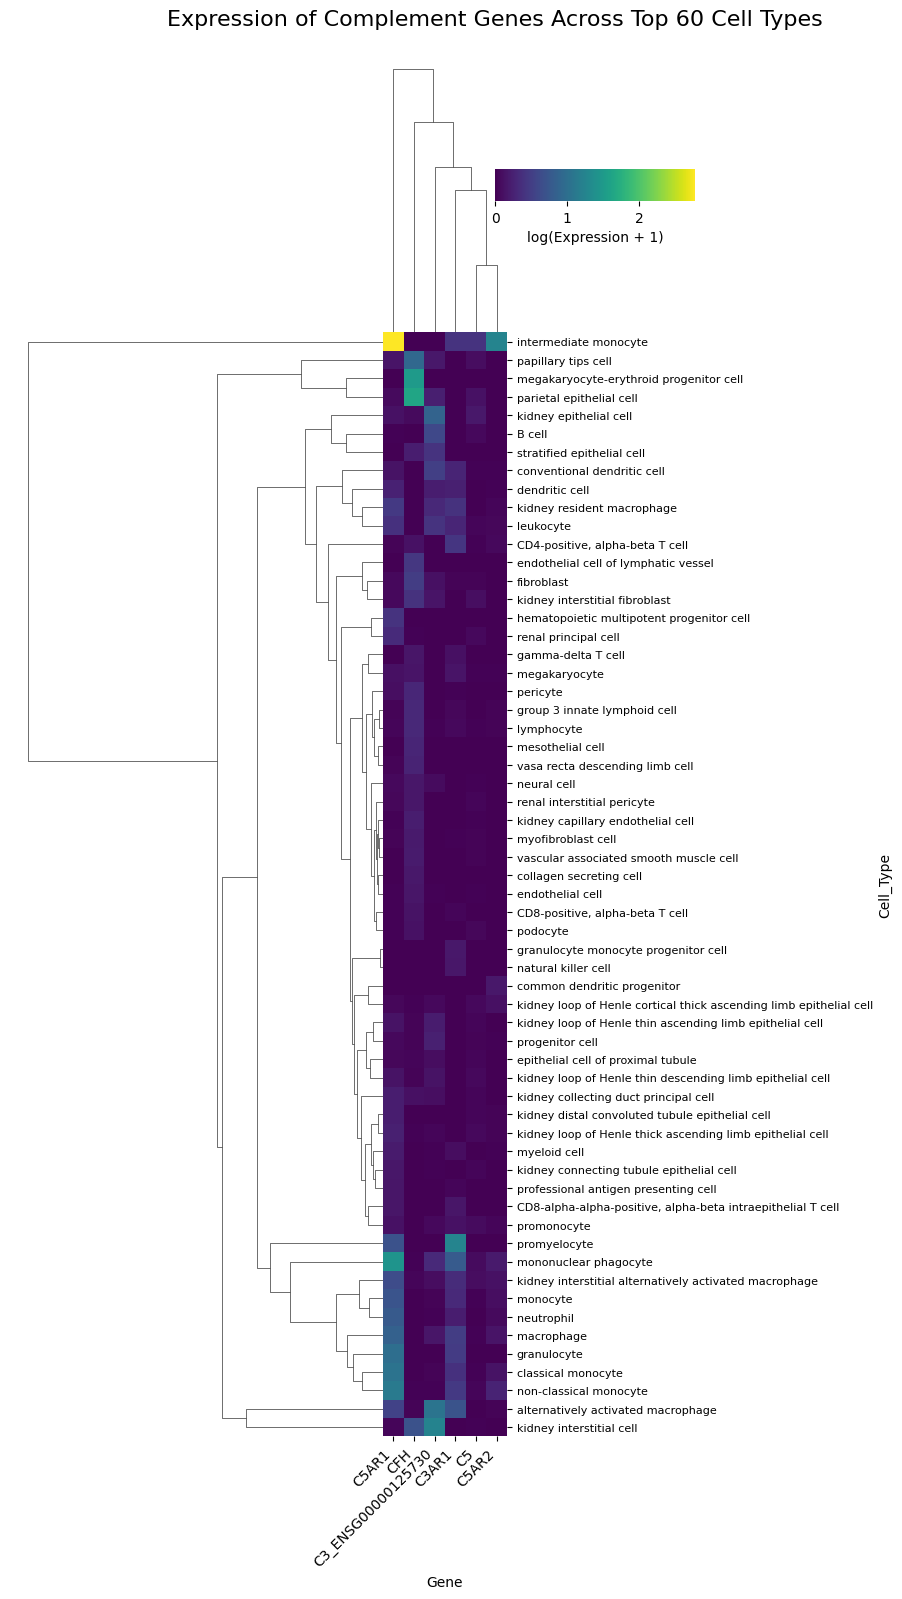

In [51]:
import scanpy as sc
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.cluster import hierarchy
from mpl_toolkits.axes_grid1 import make_axes_locatable

# List of genes to analyze
genes = ['CFH', 'C5', 'C3AR1', 'C3_ENSG00000125730', 'C5AR1', 'C5AR2']

# Ensure the genes are in the dataset
valid_genes = [gene for gene in genes if gene in adata.var_names]

if not valid_genes:
    print("None of the specified genes are in the dataset.")
else:
    print(f"Found {len(valid_genes)} valid genes")

    # Create a dataframe to collect all expression data
    all_expression_data = pd.DataFrame()

    # Collect expression data for each gene
    for gene in valid_genes:
        # Get expression values
        expr_values = adata[:, gene].X.toarray().flatten()

        # Get cell types
        cell_types = adata.obs["cell_type"]

        # Create temporary dataframe for this gene
        temp_df = pd.DataFrame({
            "Gene": gene,
            "Cell_Type": cell_types,
            "Expression": expr_values
        })

        # Append to the main dataframe
        all_expression_data = pd.concat([all_expression_data, temp_df])

    # Calculate mean expression per cell type across all genes
    cell_type_mean_expr = all_expression_data.groupby("Cell_Type")["Expression"].mean()

    # Get top 60 cell types based on mean expression
    top_60_cell_types = cell_type_mean_expr.sort_values(ascending=False).head(60).index.tolist()

    # Filter data to only include top 60 cell types
    filtered_data = all_expression_data[all_expression_data["Cell_Type"].isin(top_60_cell_types)]

    # Pivot the data to create a matrix suitable for heatmap plotting
    heatmap_data = filtered_data.pivot_table(
        index="Cell_Type",
        columns="Gene",
        values="Expression",
        aggfunc="mean"
    )

    # Apply log transformation for better visualization
    heatmap_data_log = np.log1p(heatmap_data)

    # Plot clustered heatmap
    plt.figure(figsize=(12, 20))
    g = sns.clustermap(
        heatmap_data_log,
        figsize=(10, 16),
        cmap="viridis",
        yticklabels=True,
        xticklabels=True,
        cbar_pos=(0.5, 0.9, 0.2, 0.02),  # Move colorbar to top (x, y, width, height)
        cbar_kws={'orientation': 'horizontal', 'label': 'log(Expression + 1)'},
        dendrogram_ratio=(0.75, 0.2),
        row_cluster=True,  # Cluster cell types
        col_cluster=True   # Cluster genes
    )

    # Adjust font sizes and rotate x-axis labels for better readability
    g.ax_heatmap.set_yticklabels(g.ax_heatmap.get_yticklabels(), fontsize=8)
    g.ax_heatmap.set_xticklabels(g.ax_heatmap.get_xticklabels(), fontsize=10, rotation=45, ha='right')

    plt.suptitle("Expression of Complement Genes Across Top 60 Cell Types", y=1.02, fontsize=16)
    plt.show()